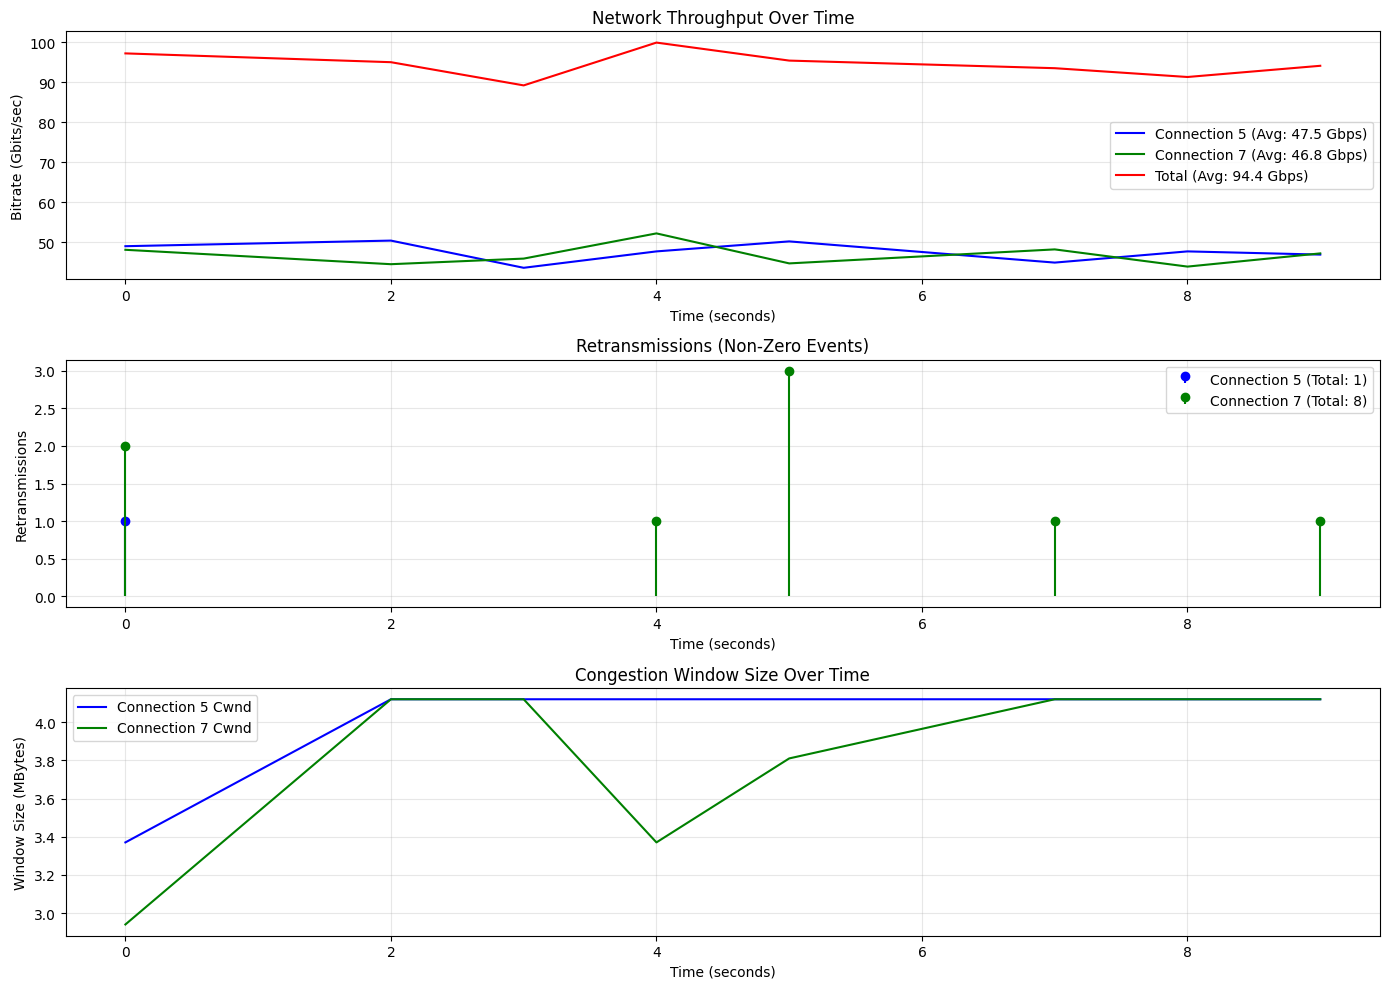

In [11]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

def parse_iperf_log(filename):
    """More robust parser that handles irregular data reporting"""
    entries = []

    with open(filename) as f:
        current_time = None
        entry = {}

        for line in f:
            # Connection 5 data
            if match := re.match(r'\[  5\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate5': float(bitrate),
                    'retr5': int(retr),
                    'transfer5': float(transfer),
                    'cwnd5': float(cwnd)
                })

            # Connection 7 data
            elif match := re.match(r'\[  7\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate7': float(bitrate),
                    'retr7': int(retr),
                    'transfer7': float(transfer),
                    'cwnd7': float(cwnd)
                })

            # SUM data
            elif match := re.match(r'\[SUM\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec', line):
                start, end, transfer, bitrate = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'sum_bitrate': float(bitrate),
                    'sum_transfer': float(transfer)
                })

                # When we get SUM line, we've completed all data for this interval
                entries.append(entry)
                entry = {}

    # Create DataFrame and forward fill missing values
    df = pd.DataFrame(entries)
    return df

def plot_iperf_data(df):
    """Visualization with error handling for missing data"""
    plt.figure(figsize=(14, 10))

    # 1. Throughput Plot
    plt.subplot(3, 1, 1)
    if 'bitrate5' in df:
        plt.plot(df['time'], df['bitrate5'], 'b-',
                label=f'Connection 5 (Avg: {df["bitrate5"].mean():.1f} Gbps)')
    if 'bitrate7' in df:
        plt.plot(df['time'], df['bitrate7'], 'g-',
                label=f'Connection 7 (Avg: {df["bitrate7"].mean():.1f} Gbps)')
    if 'sum_bitrate' in df:
        plt.plot(df['time'], df['sum_bitrate'], 'r-',
                label=f'Total (Avg: {df["sum_bitrate"].mean():.1f} Gbps)')

    plt.title('Network Throughput Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bitrate (Gbits/sec)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 2. Retransmissions Plot
    plt.subplot(3, 1, 2)
    if 'retr5' in df:
        retr5_mask = df['retr5'].fillna(0) > 0
        plt.stem(df.loc[retr5_mask, 'time'], df.loc[retr5_mask, 'retr5'],
                'b-', markerfmt='bo', basefmt=" ",
                label=f'Connection 5 (Total: {int(df["retr5"].sum())})')
    if 'retr7' in df:
        retr7_mask = df['retr7'].fillna(0) > 0
        plt.stem(df.loc[retr7_mask, 'time'], df.loc[retr7_mask, 'retr7'],
                'g-', markerfmt='go', basefmt=" ",
                label=f'Connection 7 (Total: {int(df["retr7"].sum())})')

    plt.title('Retransmissions (Non-Zero Events)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Retransmissions')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 3. Congestion Window Plot
    plt.subplot(3, 1, 3)
    if 'cwnd5' in df:
        plt.plot(df['time'], df['cwnd5'], 'b-', label='Connection 5 Cwnd')
    if 'cwnd7' in df:
        plt.plot(df['time'], df['cwnd7'], 'g-', label='Connection 7 Cwnd')

    plt.title('Congestion Window Size Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Window Size (MBytes)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.savefig('iperf_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    try:
        df = parse_iperf_log('iperf_no_limit.log')
        # Fill any remaining NaN values with previous values
        df = df.ffill()
        plot_iperf_data(df)
    except FileNotFoundError:
        print("Error: File not found. Please check the filename.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

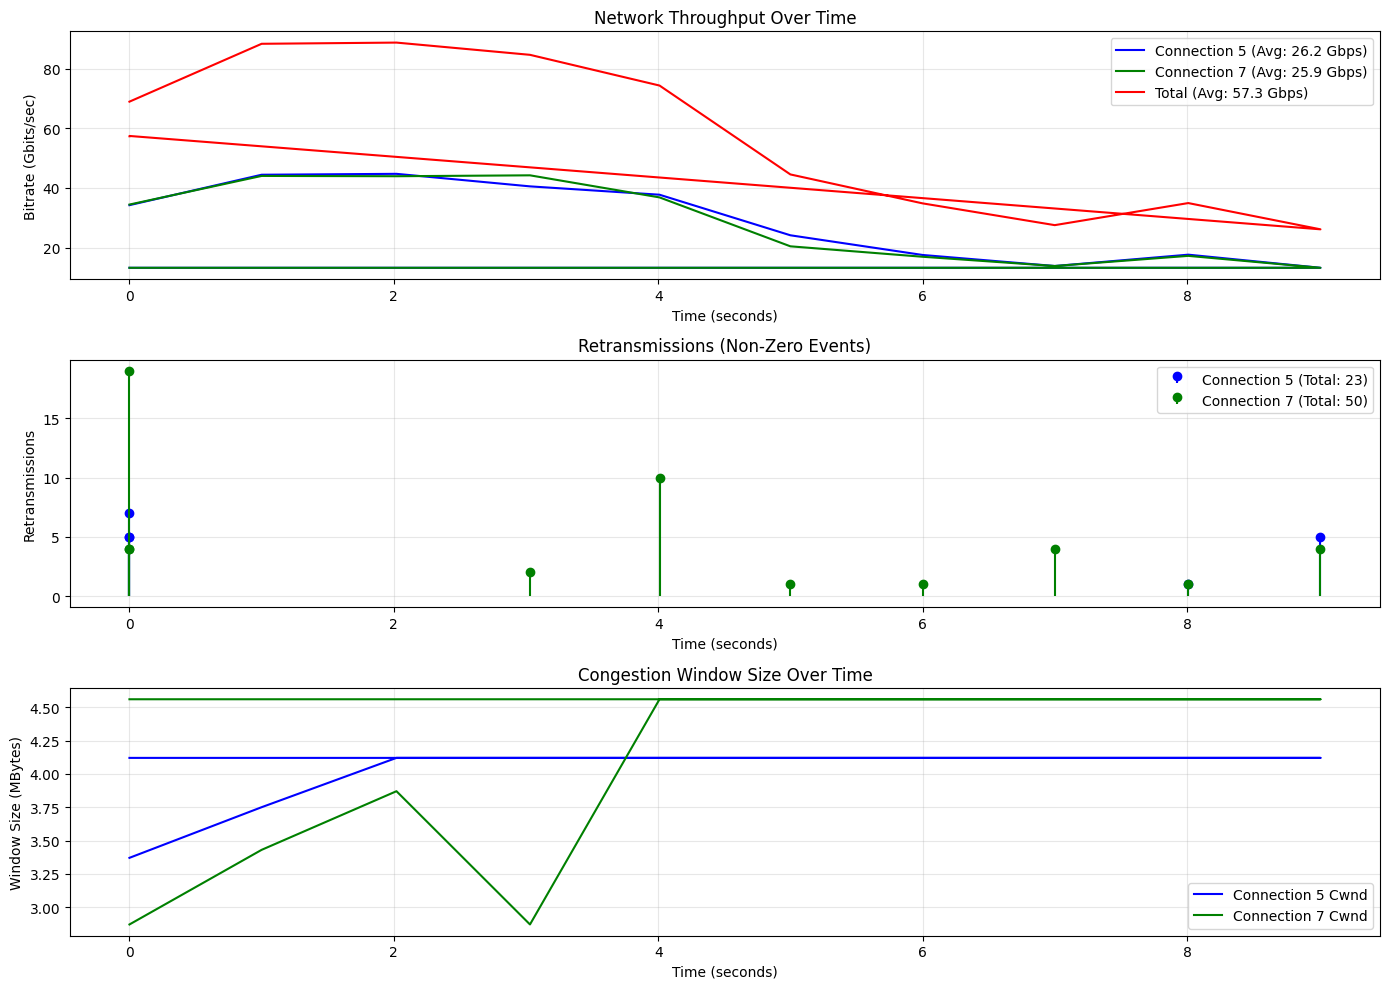

In [12]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

def parse_iperf_log(filename):
    """More robust parser that handles irregular data reporting"""
    entries = []

    with open(filename) as f:
        current_time = None
        entry = {}

        for line in f:
            # Connection 5 data
            if match := re.match(r'\[  5\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate5': float(bitrate),
                    'retr5': int(retr),
                    'transfer5': float(transfer),
                    'cwnd5': float(cwnd)
                })

            # Connection 7 data
            elif match := re.match(r'\[  7\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate7': float(bitrate),
                    'retr7': int(retr),
                    'transfer7': float(transfer),
                    'cwnd7': float(cwnd)
                })

            # SUM data
            elif match := re.match(r'\[SUM\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec', line):
                start, end, transfer, bitrate = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'sum_bitrate': float(bitrate),
                    'sum_transfer': float(transfer)
                })

                # When we get SUM line, we've completed all data for this interval
                entries.append(entry)
                entry = {}

    # Create DataFrame and forward fill missing values
    df = pd.DataFrame(entries)
    return df

def plot_iperf_data(df):
    """Visualization with error handling for missing data"""
    plt.figure(figsize=(14, 10))

    # 1. Throughput Plot
    plt.subplot(3, 1, 1)
    if 'bitrate5' in df:
        plt.plot(df['time'], df['bitrate5'], 'b-',
                label=f'Connection 5 (Avg: {df["bitrate5"].mean():.1f} Gbps)')
    if 'bitrate7' in df:
        plt.plot(df['time'], df['bitrate7'], 'g-',
                label=f'Connection 7 (Avg: {df["bitrate7"].mean():.1f} Gbps)')
    if 'sum_bitrate' in df:
        plt.plot(df['time'], df['sum_bitrate'], 'r-',
                label=f'Total (Avg: {df["sum_bitrate"].mean():.1f} Gbps)')

    plt.title('Network Throughput Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bitrate (Gbits/sec)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 2. Retransmissions Plot
    plt.subplot(3, 1, 2)
    if 'retr5' in df:
        retr5_mask = df['retr5'].fillna(0) > 0
        plt.stem(df.loc[retr5_mask, 'time'], df.loc[retr5_mask, 'retr5'],
                'b-', markerfmt='bo', basefmt=" ",
                label=f'Connection 5 (Total: {int(df["retr5"].sum())})')
    if 'retr7' in df:
        retr7_mask = df['retr7'].fillna(0) > 0
        plt.stem(df.loc[retr7_mask, 'time'], df.loc[retr7_mask, 'retr7'],
                'g-', markerfmt='go', basefmt=" ",
                label=f'Connection 7 (Total: {int(df["retr7"].sum())})')

    plt.title('Retransmissions (Non-Zero Events)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Retransmissions')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 3. Congestion Window Plot
    plt.subplot(3, 1, 3)
    if 'cwnd5' in df:
        plt.plot(df['time'], df['cwnd5'], 'b-', label='Connection 5 Cwnd')
    if 'cwnd7' in df:
        plt.plot(df['time'], df['cwnd7'], 'g-', label='Connection 7 Cwnd')

    plt.title('Congestion Window Size Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Window Size (MBytes)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.savefig('iperf_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    try:
        df = parse_iperf_log('iperf_100mbit.log')
        # Fill any remaining NaN values with previous values
        df = df.ffill()
        plot_iperf_data(df)
    except FileNotFoundError:
        print("Error: File not found. Please check the filename.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

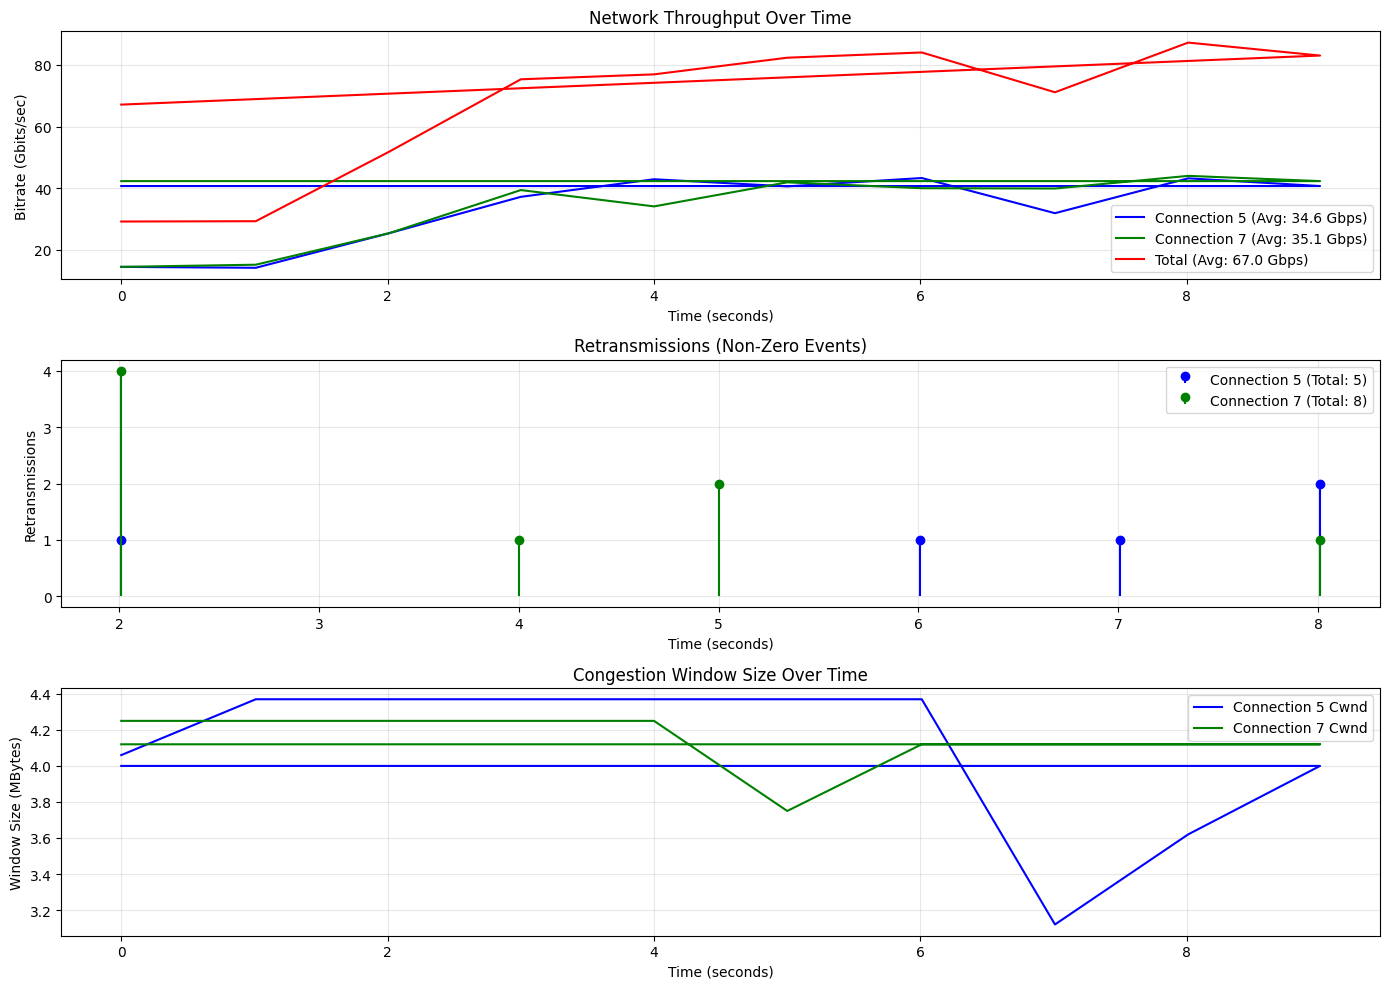

In [13]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

def parse_iperf_log(filename):
    """More robust parser that handles irregular data reporting"""
    entries = []

    with open(filename) as f:
        current_time = None
        entry = {}

        for line in f:
            # Connection 5 data
            if match := re.match(r'\[  5\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate5': float(bitrate),
                    'retr5': int(retr),
                    'transfer5': float(transfer),
                    'cwnd5': float(cwnd)
                })

            # Connection 7 data
            elif match := re.match(r'\[  7\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec\s+(\d+)\s+(\d+\.\d+)\s+MBytes', line):
                start, end, transfer, bitrate, retr, cwnd = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'bitrate7': float(bitrate),
                    'retr7': int(retr),
                    'transfer7': float(transfer),
                    'cwnd7': float(cwnd)
                })

            # SUM data
            elif match := re.match(r'\[SUM\]\s+(\d+\.\d+)-(\d+\.\d+).*?\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec', line):
                start, end, transfer, bitrate = match.groups()
                current_time = float(start)
                entry.update({
                    'time': current_time,
                    'sum_bitrate': float(bitrate),
                    'sum_transfer': float(transfer)
                })

                # When we get SUM line, we've completed all data for this interval
                entries.append(entry)
                entry = {}

    # Create DataFrame and forward fill missing values
    df = pd.DataFrame(entries)
    return df

def plot_iperf_data(df):
    """Visualization with error handling for missing data"""
    plt.figure(figsize=(14, 10))

    # 1. Throughput Plot
    plt.subplot(3, 1, 1)
    if 'bitrate5' in df:
        plt.plot(df['time'], df['bitrate5'], 'b-',
                label=f'Connection 5 (Avg: {df["bitrate5"].mean():.1f} Gbps)')
    if 'bitrate7' in df:
        plt.plot(df['time'], df['bitrate7'], 'g-',
                label=f'Connection 7 (Avg: {df["bitrate7"].mean():.1f} Gbps)')
    if 'sum_bitrate' in df:
        plt.plot(df['time'], df['sum_bitrate'], 'r-',
                label=f'Total (Avg: {df["sum_bitrate"].mean():.1f} Gbps)')

    plt.title('Network Throughput Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bitrate (Gbits/sec)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 2. Retransmissions Plot
    plt.subplot(3, 1, 2)
    if 'retr5' in df:
        retr5_mask = df['retr5'].fillna(0) > 0
        plt.stem(df.loc[retr5_mask, 'time'], df.loc[retr5_mask, 'retr5'],
                'b-', markerfmt='bo', basefmt=" ",
                label=f'Connection 5 (Total: {int(df["retr5"].sum())})')
    if 'retr7' in df:
        retr7_mask = df['retr7'].fillna(0) > 0
        plt.stem(df.loc[retr7_mask, 'time'], df.loc[retr7_mask, 'retr7'],
                'g-', markerfmt='go', basefmt=" ",
                label=f'Connection 7 (Total: {int(df["retr7"].sum())})')

    plt.title('Retransmissions (Non-Zero Events)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Retransmissions')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 3. Congestion Window Plot
    plt.subplot(3, 1, 3)
    if 'cwnd5' in df:
        plt.plot(df['time'], df['cwnd5'], 'b-', label='Connection 5 Cwnd')
    if 'cwnd7' in df:
        plt.plot(df['time'], df['cwnd7'], 'g-', label='Connection 7 Cwnd')

    plt.title('Congestion Window Size Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Window Size (MBytes)')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.savefig('iperf_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    try:
        df = parse_iperf_log('iperf_latency.log')
        # Fill any remaining NaN values with previous values
        df = df.ffill()
        plot_iperf_data(df)
    except FileNotFoundError:
        print("Error: File not found. Please check the filename.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

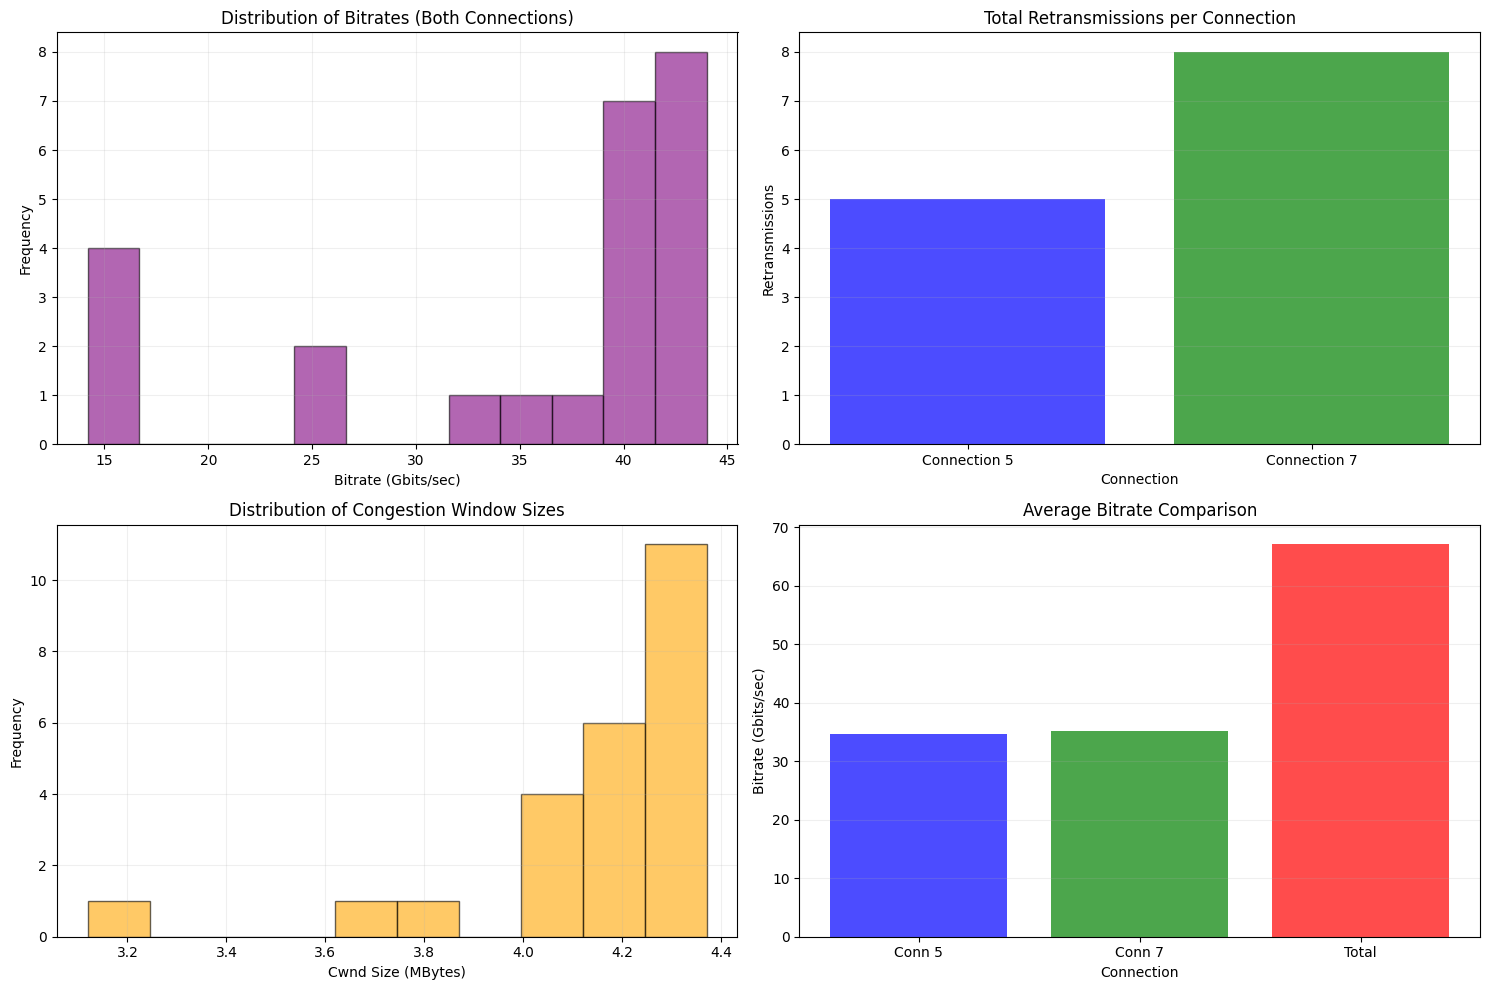

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_iperf_data_alternative(df):
    plt.figure(figsize=(15, 10))

    # --- 1. Throughput Histogram (Bitrate Distribution) ---
    plt.subplot(2, 2, 1)
    bitrate_data = pd.concat([df['bitrate5'].dropna(), df['bitrate7'].dropna()])
    plt.hist(bitrate_data, bins=12, color='purple', alpha=0.6, edgecolor='black')
    plt.title('Distribution of Bitrates (Both Connections)')
    plt.xlabel('Bitrate (Gbits/sec)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.2)

    # --- 2. Retransmissions Bar Chart (Total per Connection) ---
    plt.subplot(2, 2, 2)
    retr_data = [df['retr5'].sum(), df['retr7'].sum()]
    plt.bar(['Connection 5', 'Connection 7'], retr_data, color=['blue', 'green'], alpha=0.7)
    plt.title('Total Retransmissions per Connection')
    plt.xlabel('Connection')
    plt.ylabel('Retransmissions')
    plt.grid(True, axis='y', alpha=0.2)

    # --- 3. Cwnd Histogram (Window Size Distribution) ---
    plt.subplot(2, 2, 3)
    cwnd_data = pd.concat([df['cwnd5'].dropna(), df['cwnd7'].dropna()])
    plt.hist(cwnd_data, bins=10, color='orange', alpha=0.6, edgecolor='black')
    plt.title('Distribution of Congestion Window Sizes')
    plt.xlabel('Cwnd Size (MBytes)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.2)

    # --- 4. Throughput Comparison (Bar Chart) ---
    plt.subplot(2, 2, 4)
    avg_bitrates = [df['bitrate5'].mean(), df['bitrate7'].mean(), df['sum_bitrate'].mean()]
    plt.bar(['Conn 5', 'Conn 7', 'Total'], avg_bitrates, color=['blue', 'green', 'red'], alpha=0.7)
    plt.title('Average Bitrate Comparison')
    plt.xlabel('Connection')
    plt.ylabel('Bitrate (Gbits/sec)')
    plt.grid(True, axis='y', alpha=0.2)

    plt.tight_layout()
    plt.savefig('iperf_alternative_visualization.png', dpi=300)
    plt.show()

# Run with your parsed DataFrame
plot_iperf_data_alternative(df)